In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")
pref["日付"] = pd.to_datetime(pref["日付"] )
print(len(pref))
pref.tail()

22231


,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計
22226,2021-04-28,47,沖縄県,63,12328,0,134
22227,2021-04-29,47,沖縄県,76,12404,0,134
22228,2021-04-30,47,沖縄県,59,12463,2,136
22229,2021-05-01,47,沖縄県,105,12568,1,137
22230,2021-05-02,47,沖縄県,57,12625,0,137


In [3]:
all_jp = pref.groupby(["都道府県名"], as_index=False).sum()
del all_jp["各地の感染者数_累計"]
del all_jp["各地の死者数_累計"]
#all_jp = all_jp.rename(columns={"各地の感染者数合計":"各地の感染者数_1日ごとの発表数"})
all_jp = all_jp.rename(columns={"各地の感染者数_1日ごとの発表数":"各地の感染者数合計"})
all_jp.tail()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数_1日ごとの発表数
42,静岡県,10406,6545,121
43,香川県,17501,1310,22
44,高知県,18447,1067,20
45,鳥取県,14663,374,2
46,鹿児島県,21758,2225,28


## 人口データを付与

In [4]:
pop = pd.read_excel("COVID-19-jp/2001stjin.xls",header=3)[["Unnamed: 1","計"]]
pop.rename(columns={"Unnamed: 1":"都道府県名"},inplace=True)
pop.rename(columns={"計":"人口"},inplace=True)
pop = pop.loc[pop["都道府県名"]!="合計"].reset_index(drop=True)
pop.head()

,都道府県名,人口
0,北海道,5267762
1,青森県,1275783
2,岩手県,1235517
3,宮城県,2292385
4,秋田県,985416


In [5]:
all_jp = pd.merge(all_jp, pop, on="都道府県名", how="left")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数_1日ごとの発表数,人口
0,三重県,11352,3863,87,1813859
1,京都府,12298,12836,187,2545899
2,佐賀県,19393,1659,13,823810
3,兵庫県,13244,32581,702,5549568
4,北海道,473,24676,867,5267762


## 人口当たりの感染者数

In [6]:
all_jp["１万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 10000)
all_jp.sort_values("都道府県コード")

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数_1日ごとの発表数,人口,１万人当たりの感染者数
4,北海道,473,24676,867,5267762,46.843422
41,青森県,946,1620,23,1275783,12.698084
19,岩手県,1419,970,32,1235517,7.850964
11,宮城県,1892,8118,69,2292385,35.412900
36,秋田県,2365,492,9,985416,4.992815
15,山形県,2838,1530,33,1082296,14.136613
35,福島県,3311,3464,124,1881981,18.406137
38,茨城県,3784,8271,135,2921436,28.311419
27,栃木県,4257,5401,71,1965516,27.478789
37,群馬県,4730,6175,104,1969439,31.354106


## 感染者数

### 平均値、中央値

In [7]:
print(all_jp["各地の感染者数合計"].describe())

count        47.000000
mean      12808.170213
std       25073.183159
min         356.000000
25%        1639.500000
50%        3818.000000
75%        8194.500000
max      141005.000000
Name: 各地の感染者数合計, dtype: float64


## １万人あたりの感染者数

### 平均値、中央値

In [8]:
print(all_jp["１万人当たりの感染者数"].describe())

count     47.000000
mean      29.229400
std       22.480353
min        4.992815
25%       14.563053
50%       21.297135
75%       40.295628
max      101.919598
Name: １万人当たりの感染者数, dtype: float64


## グラフ化

In [9]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

In [10]:
all_jp_desc = all_jp.sort_values(["各地の感染者数合計"],ascending=False)
all_jp_desc_10k = all_jp.sort_values(["１万人当たりの感染者数"],ascending=False)


<IPython.core.display.Javascript object>


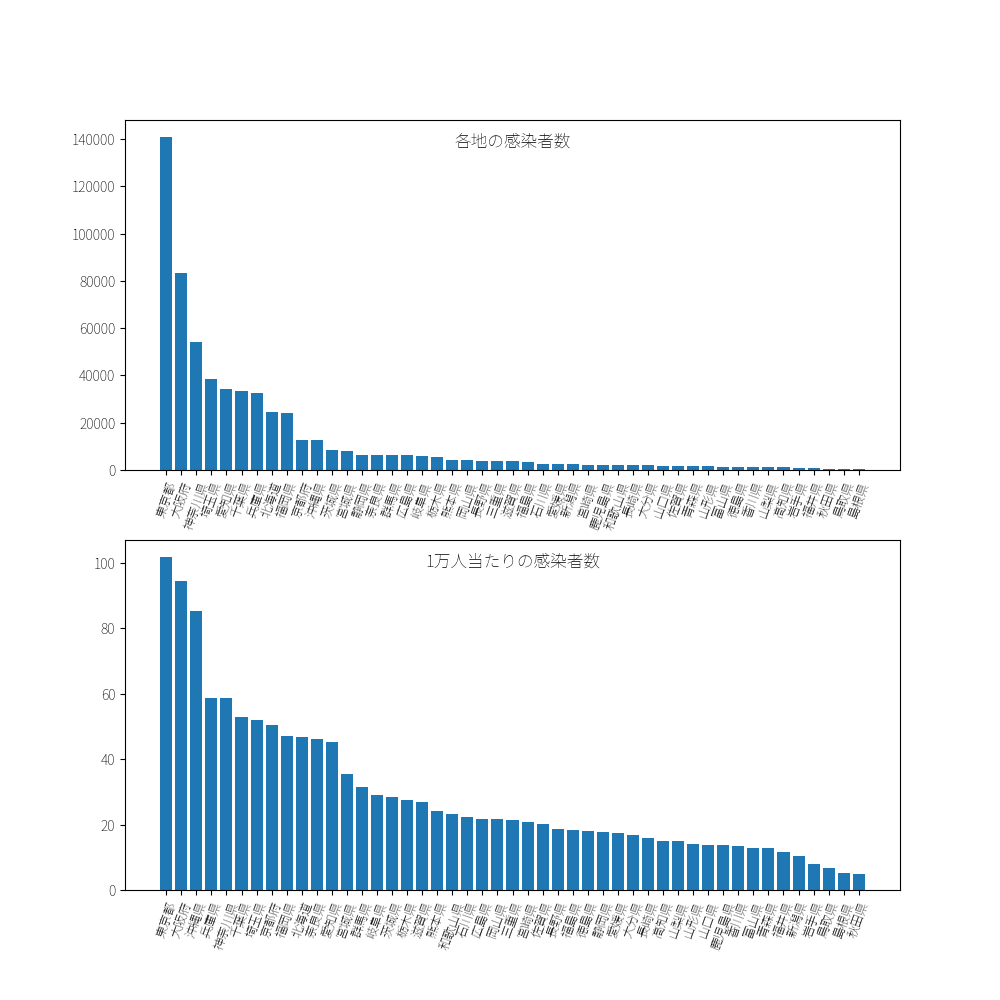

Text(0.5, 0.9, '1万人当たりの感染者数')

In [11]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2,1,1) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc["都道府県名"], all_jp_desc["各地の感染者数合計"])
plt.title("各地の感染者数", y=0.9)

plt.subplot(2,1,2) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc_10k["都道府県名"], all_jp_desc_10k["１万人当たりの感染者数"])
plt.title("1万人当たりの感染者数",y=0.9)
